In [1]:
# importing of libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading of data
data = pd.read_excel('data_p.xlsx')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Basic Checks

In [4]:
# prints first 5 rows of the data
data.head()

,State,Year,Population(M),Population(F),Population(Total),Per Capita Income,GST
0,Jammu and Kashmir,2019,6651,6130,12780,91882.0,3016.0
1,Himachal Pradesh,2019,3725,3534,7259,179188.0,5968.0
2,Punjab,2019,16162,13706,29868,154996.0,10972.0
3,Chandigarh,2019,1230,798,2028,329209.0,1433.0
4,Uttarakhand,2019,5629,5381,11010,198738.0,10670.0


In [5]:
# prints last5 rows of the data
data.tail()

,State,Year,Population(M),Population(F),Population(Total),Per Capita Income,GST
106,Puducherry,2021,1208,820,2028,221000.0,916.09
107,Andaman and Nicobar Islands,2021,312,305,617,218648.0,133.92
108,Telangana,2021,18850,17420,37270,250691.0,22286.86
109,Andhra Pradesh,2021,45880,45669,91549,170215.0,16132.66
110,Ladakh,2021,4005,4417,8422,17000.0,83.73


In [6]:
# used to view some basic statistical details like percentile, mean, std etc
data.describe()

,Year,Population(M),Population(F),Population(Total),Per Capita Income,GST
count,111.0000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,2020.0000,19164.405405,17862.495495,37033.153153,170466.725829,18000.150000
std,0.8202,25030.284460,22980.896184,47998.282234,108681.055129,25899.430451
min,2019.0000,40.000000,44.000000,84.000000,225.567000,0.000000
25%,2019.0000,1267.000000,959.000000,2198.000000,91440.000000,884.545000
50%,2020.0000,13270.000000,10549.000000,23818.000000,147309.000000,8605.220000
75%,2021.0000,32725.500000,30988.500000,64629.000000,226014.000000,24089.385000
max,2021.0000,123532.000000,111099.000000,234631.000000,520031.000000,149963.660000


In [7]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              111 non-null    object 
 1   Year               111 non-null    int64  
 2   Population(M)      111 non-null    int64  
 3   Population(F)      111 non-null    int64  
 4   Population(Total)  111 non-null    int64  
 5   Per Capita Income  111 non-null    float64
 6   GST                111 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 6.2+ KB


In [8]:
# it shows the number columns and rows that data consists
data.shape

(111, 7)

In [9]:
# displays all the columns
data.columns

Index(['State', 'Year', 'Population(M)', 'Population(F)', 'Population(Total)',
       'Per Capita Income', 'GST'],
      dtype='object')

## Data Preprocessing

In [4]:
# These are the new columns
## the columns from the original can be renamed at our convinience
data=data.rename(columns={'Per Capita Income':'Per_Capita_Income', 
                          'Population(F)':'Population_F',
                          'Population(M)':'Population_M',
                          'Population(Total)':'Population_Total'
                         })

In [11]:
data.columns

Index(['State', 'Year', 'Population_M', 'Population_F', 'Population_Total',
       'Per_Capita_Income', 'GST'],
      dtype='object')

In [12]:
#checking null
data.isnull().values.any()

False

In [13]:
data.isnull().sum()

State                0
Year                 0
Population_M         0
Population_F         0
Population_Total     0
Per_Capita_Income    0
GST                  0
dtype: int64

In [14]:
data.isna().any()

State                False
Year                 False
Population_M         False
Population_F         False
Population_Total     False
Per_Capita_Income    False
GST                  False
dtype: bool

### Value count and unique in columns

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              111 non-null    object 
 1   Year               111 non-null    int64  
 2   Population_M       111 non-null    int64  
 3   Population_F       111 non-null    int64  
 4   Population_Total   111 non-null    int64  
 5   Per_Capita_Income  111 non-null    float64
 6   GST                111 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 6.2+ KB


In [19]:
#checking out the number of object present.
data.select_dtypes('integer').apply(pd.Series.nunique, axis = 0)

Year                  3
Population_M        109
Population_F        110
Population_Total    110
dtype: int64

In [20]:
#checking out the number of object present.
data.select_dtypes('float').apply(pd.Series.nunique, axis = 0)

Per_Capita_Income    111
GST                  111
dtype: int64

In [16]:
#checking out the number of object present.
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

State    37
dtype: int64

In [15]:
data.Per_Capita_Income.value_counts()

126212.000    1
73000.000     1
218648.000    1
254855.000    1
181185.000    1
87127.000     1
105281.000    1
90998.000     1
193750.000    1
236147.000    1
139512.000    1
110606.000    1
226144.000    1
187327.000    1
95164.000     1
458304.000    1
75412.000     1
48817.000     1
139588.000    1
191736.000    1
131128.000    1
160000.000    1
77432.000     1
170215.000    1
124300.000    1
246419.000    1
154996.000    1
73555.000     1
17000.000     1
221000.000    1
74141.000     1
243198.000    1
151173.000    1
225.567       1
96887.000     1
101851.000    1
109491.000    1
113079.000    1
98281.000     1
169741.000    1
40980.000     1
85000.000     1
229488.000    1
204488.000    1
249820.000    1
91882.000     1
50735.000     1
486248.000    1
329209.000    1
204105.000    1
221380.000    1
487196.000    1
242835.000    1
78367.000     1
76019.000     1
82078.000     1
245323.000    1
66512.000     1
69978.000     1
222214.000    1
73792.000     1
44676.000     1
91907.00

In [50]:
data.Year.value_counts()

2019    37
2020    37
2021    37
Name: Year, dtype: int64

In [53]:
data.Year.unique()

array([2019, 2020, 2021], dtype=int64)

In [51]:
data.State.value_counts()

Daman and Diu                  3
Arunachal Pradesh              3
Nagaland                       3
Haryana                        3
Goa                            3
Sikkim                         3
Uttar Pradesh                  3
Telangana                      3
Bihar                          3
Dadra and Nagar Haveli         3
Lakshadweep                    3
Delhi                          3
Karnataka                      3
Jammu and Kashmir              3
Manipur                        3
Madhya Pradesh                 3
Uttarakhand                    3
Kerala                         3
Himachal Pradesh               3
Tripura                        3
Punjab                         3
Meghalaya                      3
Chhattisgarh                   3
Ladakh                         3
Jharkhand                      3
Andaman and Nicobar Islands    3
Chandigarh                     3
Andhra Pradesh                 3
Mizoram                        3
Tamil Nadu                     3
Puducherry

In [52]:
data.State.unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharashtra',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman and Nicobar Islands', 'Telangana',
       'Andhra Pradesh', 'Ladakh'], dtype=object)

In [54]:
data.head()

,State,Year,Population(M),Population(F),Population(Total),Per_Capita_Income,GST
0,Jammu and Kashmir,2019,6651,6130,12780,91882.0,3016.0
1,Himachal Pradesh,2019,3725,3534,7259,179188.0,5968.0
2,Punjab,2019,16162,13706,29868,154996.0,10972.0
3,Chandigarh,2019,1230,798,2028,329209.0,1433.0
4,Uttarakhand,2019,5629,5381,11010,198738.0,10670.0


In [56]:
data.describe(include=['object'])

,State
count,111
unique,37
top,Daman and Diu
freq,3


In [57]:
data.describe(include=['integer'])

,Year,Population(M),Population(F),Population(Total)
count,111.0000,111.000000,111.000000,111.000000
mean,2020.0000,19164.405405,17862.495495,37033.153153
std,0.8202,25030.284460,22980.896184,47998.282234
min,2019.0000,40.000000,44.000000,84.000000
25%,2019.0000,1267.000000,959.000000,2198.000000
50%,2020.0000,13270.000000,10549.000000,23818.000000
75%,2021.0000,32725.500000,30988.500000,64629.000000
max,2021.0000,123532.000000,111099.000000,234631.000000


In [58]:
data.describe(include=['float'])

,Per_Capita_Income,GST
count,111.000000,111.000000
mean,170466.725829,18000.150000
std,108681.055129,25899.430451
min,225.567000,0.000000
25%,91440.000000,884.545000
50%,147309.000000,8605.220000
75%,226014.000000,24089.385000
max,520031.000000,149963.660000


# Exploratory Data Analysis

<AxesSubplot:xlabel='Population_M'>

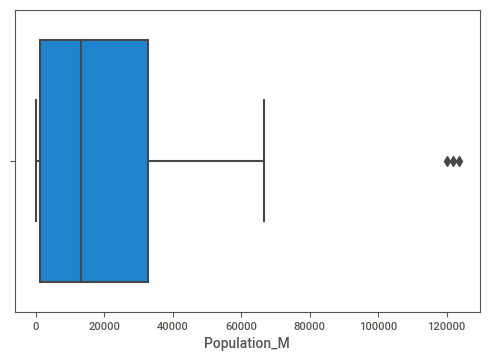

In [105]:
sns.boxplot(data.Population_M)

<AxesSubplot:xlabel='Population_F'>

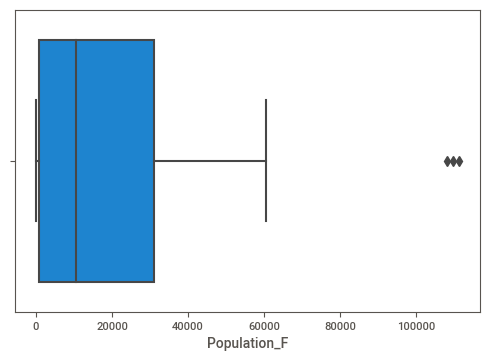

In [106]:
sns.boxplot(data.Population_F)

<AxesSubplot:xlabel='Population_Total'>

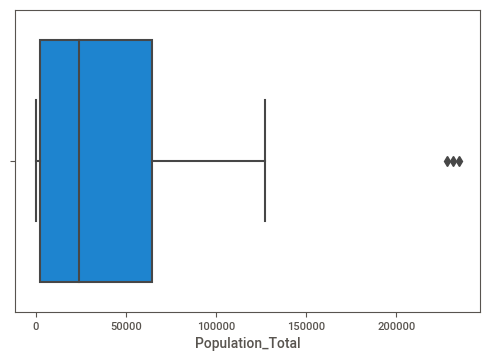

In [107]:
sns.boxplot(data.Population_Total)

<AxesSubplot:xlabel='Per_Capita_Income'>

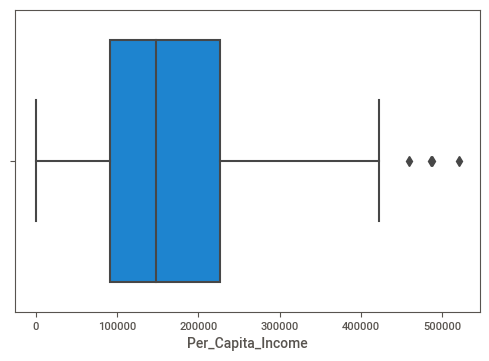

In [108]:
sns.boxplot(data.Per_Capita_Income)

<AxesSubplot:xlabel='GST'>

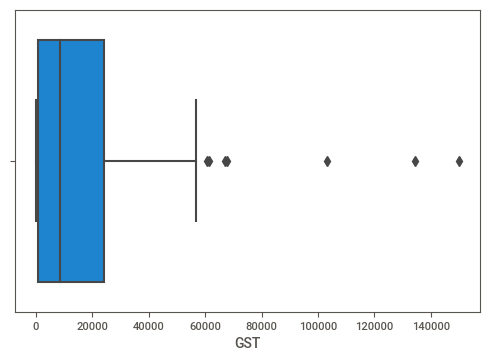

In [109]:
sns.boxplot(data.GST)

### Univariate Analysis

In [62]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data,title="Pandas Profiling Report", minimal=True)
profile.to_widgets()
profile.to_file("P&P_Pandas_Profiling_Report.html")

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Multivariate Analysis

In [64]:
## since the target value in the data contains Nan value,data need to be imputed for further analysis
report1=sv.analyze([data,'data'],target_feat='Per_Capita_Income')
report1.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [65]:
## since the target value in the data contains Nan value,data need to be imputed for further analysis
report2=sv.analyze([data,'data'],target_feat='Population(Total)')
report2.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [90]:
data.columns

Index(['State', 'Year', 'Population_M', 'Population_F', 'Population_Total',
       'Per_Capita_Income', 'GST'],
      dtype='object')

### Population_M

In [76]:
avg = data['Population_M'].mean()
print(str(avg) + " is the Average Population_M ")

19164.405405405407 is the Average Population(M) 


In [77]:
total_Population_M=data['Population_M'].sum()
total_Population_M   

2127249

In [44]:
#lowest Male population
data.sort_values(by = 'Population_M' , ascending = True).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
29,Lakshadweep,2019,40,44,84,44676.0,14.00
66,Lakshadweep,2020,40,45,85,48817.0,12.14
103,Lakshadweep,2021,41,45,86,41583.0,6.00
25,Dadra and Nagar Haveli,2019,253,215,462,81453.0,1364.00
24,Daman and Diu,2019,256,119,374,75412.0,853.00


In [45]:
#highest Male population
data.sort_values(by = 'Population_M' , ascending = False).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
82,Uttar Pradesh,2021,123532,111099,234631,73792.0,36685.63
45,Uttar Pradesh,2020,121868,109557,231425,74141.0,55169.91
8,Uttar Pradesh,2019,120164,107988,228152,66512.0,47829.00
100,Maharashtra,2021,66639,60442,127082,225884.0,103154.99
63,Maharashtra,2020,65899,59813,125711,229488.0,149963.66


<AxesSubplot:xlabel='Population_M', ylabel='Density'>

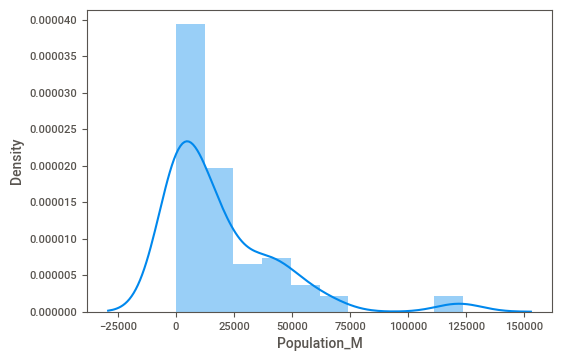

In [100]:
## ANalsyzing Population_M
sns.distplot(data.Population_M)
## Not Normal distribution

### Population_F

In [78]:
avg = data['Population_F'].mean()
print(str(avg) + " is the Average Population_F ")

17862.495495495496 is the Average Population(F) 


In [83]:
total_Population_F = data['Population_F'].sum()
total_Population_F   

1982737

In [48]:
#highest Female population
data.sort_values(by = 'Population_F' , ascending = False).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
82,Uttar Pradesh,2021,123532,111099,234631,73792.0,36685.63
45,Uttar Pradesh,2020,121868,109557,231425,74141.0,55169.91
8,Uttar Pradesh,2019,120164,107988,228152,66512.0,47829.00
100,Maharashtra,2021,66639,60442,127082,225884.0,103154.99
63,Maharashtra,2020,65899,59813,125711,229488.0,149963.66


In [46]:
#lowest Female population
data.sort_values(by = 'Population_F' , ascending = True).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
29,Lakshadweep,2019,40,44,84,44676.0,14.00
66,Lakshadweep,2020,40,45,85,48817.0,12.14
103,Lakshadweep,2021,41,45,86,41583.0,6.00
24,Daman and Diu,2019,256,119,374,75412.0,853.00
61,Daman and Diu,2020,269,122,391,77432.0,554.47


<AxesSubplot:xlabel='Population_F', ylabel='Density'>

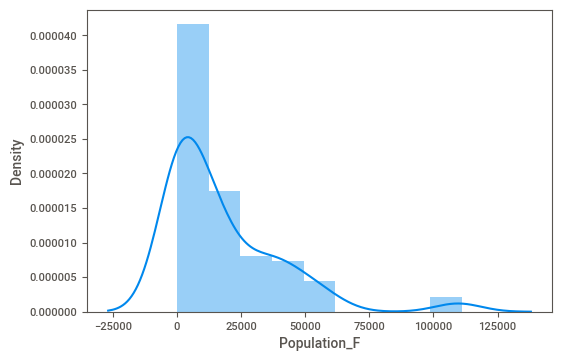

In [101]:
## ANalsyzing Population_F
sns.distplot(data.Population_F)
## Not Normal distribution

### Population_Total

In [84]:
avg = data['Population_Total'].mean()
print(str(avg) + " is the Average Population_Total")

37033.15315315315 is the Average Population(Total) 


In [85]:
total_Population_Total=data['Population_Total'].sum()
total_Population_Total   

4110680

In [49]:
#lowest Total population
data.sort_values(by = 'Population_Total' , ascending = True).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
29,Lakshadweep,2019,40,44,84,44676.0,14.00
66,Lakshadweep,2020,40,45,85,48817.0,12.14
103,Lakshadweep,2021,41,45,86,41583.0,6.00
24,Daman and Diu,2019,256,119,374,75412.0,853.00
61,Daman and Diu,2020,269,122,391,77432.0,554.47


In [50]:
#highest Total population
data.sort_values(by = 'Population_Total' , ascending = False).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
82,Uttar Pradesh,2021,123532,111099,234631,73792.0,36685.63
45,Uttar Pradesh,2020,121868,109557,231425,74141.0,55169.91
8,Uttar Pradesh,2019,120164,107988,228152,66512.0,47829.00
100,Maharashtra,2021,66639,60442,127082,225884.0,103154.99
63,Maharashtra,2020,65899,59813,125711,229488.0,149963.66


<AxesSubplot:xlabel='Population_Total', ylabel='Density'>

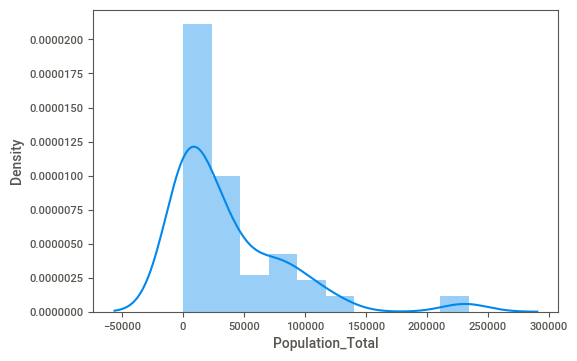

In [102]:
## ANalsyzing Population_Total
sns.distplot(data.Population_Total)
## Not Normal distribution

### Per_Capita_Income

In [86]:
avg = data['Per_Capita_Income'].mean()
print(str(avg) + " is the Average Per_Capita_Income ")

170466.72582882884 is the Average Per_Capita_Income 


In [87]:
total_Per_Capita_Income=data['Per_Capita_Income'].sum()
total_Per_Capita_Income   

18921806.567

In [51]:
#lowest Per_Capita_Income collection
data.sort_values(by = 'Per_Capita_Income' , ascending = True).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
104,Kerala,2021,17917,18652,36569,225.567,10617.04
110,Ladakh,2021,4005,4417,8422,17000.000,83.73
36,Ladakh,2019,3661,4115,7776,17737.000,0.00
73,Ladakh,2020,3807,4273,8080,18314.000,60.00
83,Bihar,2021,56341,53091,109431,40980.000,6868.74


In [52]:
#highest Per_Capita_Income collection
data.sort_values(by = 'Per_Capita_Income' , ascending = False).head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
65,Goa,2020,1204,966,2170,520031.0,3149.61
47,Sikkim,2020,357,316,673,487196.0,1975.65
84,Sikkim,2021,360,319,679,486248.0,1369.01
28,Goa,2019,1164,952,2117,458304.0,3174.00
102,Goa,2021,1249,983,2232,422149.0,1912.08


<AxesSubplot:xlabel='Per_Capita_Income', ylabel='Density'>

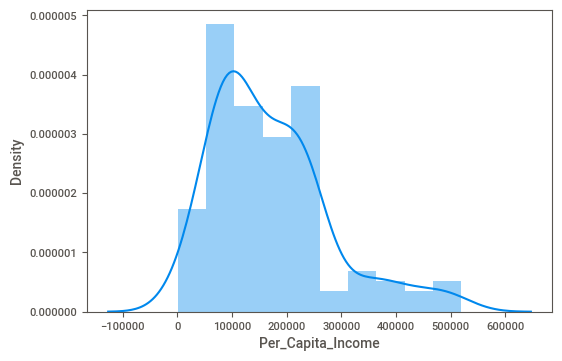

In [103]:
## ANalsyzing Per_Capita_Income
sns.distplot(data.Per_Capita_Income)
## Not Normal distribution

### State

In [33]:
statewise_gst=data.groupby('State').Population_M.sum() 
statewise_gst.sort_values(ascending=False)

State
Uttar Pradesh                  365564
Maharashtra                    197687
Bihar                          167489
West Bengal                    148467
Andhra Pradesh                 136764
Madhya Pradesh                 128698
Rajasthan                      120259
Tamil Nadu                     106089
Gujarat                        104003
Karnataka                       97838
Odisha                          66153
Telangana                       54661
Jharkhand                       54331
Kerala                          53488
Assam                           51945
Punjab                          48894
Haryana                         47222
Chhattisgarh                    40744
Delhi                           39817
Jammu and Kashmir               20099
Uttarakhand                     17070
Ladakh                          11473
Himachal Pradesh                11259
Tripura                          6099
Meghalaya                        4368
Manipur                          4069
Chandi

In [32]:
statewise_gst=data.groupby('State').Population_M.mean() 
statewise_gst.sort_values(ascending=False)

State
Uttar Pradesh                  121854.666667
Maharashtra                     65895.666667
Bihar                           55829.666667
West Bengal                     49489.000000
Andhra Pradesh                  45588.000000
Madhya Pradesh                  42899.333333
Rajasthan                       40086.333333
Tamil Nadu                      35363.000000
Gujarat                         34667.666667
Karnataka                       32612.666667
Odisha                          22051.000000
Telangana                       18220.333333
Jharkhand                       18110.333333
Kerala                          17829.333333
Assam                           17315.000000
Punjab                          16298.000000
Haryana                         15740.666667
Chhattisgarh                    13581.333333
Delhi                           13272.333333
Jammu and Kashmir                6699.666667
Uttarakhand                      5690.000000
Ladakh                           3824.333333
Hima

In [31]:
statewise_gst=data.groupby('State').Population_F.sum() 
statewise_gst.sort_values(ascending=False)

State
Uttar Pradesh                  328644
Maharashtra                    179432
Bihar                          157608
West Bengal                    141423
Andhra Pradesh                 136065
Madhya Pradesh                 117672
Rajasthan                      110004
Tamil Nadu                     105737
Karnataka                       95357
Gujarat                         92559
Odisha                          65127
Kerala                          55732
Telangana                       52612
Jharkhand                       51487
Assam                           49610
Punjab                          41398
Chhattisgarh                    40442
Haryana                         39772
Delhi                           31651
Jammu and Kashmir               18557
Uttarakhand                     16309
Ladakh                          12805
Himachal Pradesh                10671
Tripura                          5849
Meghalaya                        4293
Manipur                          4024
Nagala

In [30]:
statewise_gst=data.groupby('State').Population_F.mean() 
statewise_gst.sort_values(ascending=False)

State
Uttar Pradesh                  109548.000000
Maharashtra                     59810.666667
Bihar                           52536.000000
West Bengal                     47141.000000
Andhra Pradesh                  45355.000000
Madhya Pradesh                  39224.000000
Rajasthan                       36668.000000
Tamil Nadu                      35245.666667
Karnataka                       31785.666667
Gujarat                         30853.000000
Odisha                          21709.000000
Kerala                          18577.333333
Telangana                       17537.333333
Jharkhand                       17162.333333
Assam                           16536.666667
Punjab                          13799.333333
Chhattisgarh                    13480.666667
Haryana                         13257.333333
Delhi                           10550.333333
Jammu and Kashmir                6185.666667
Uttarakhand                      5436.333333
Ladakh                           4268.333333
Hima

In [29]:
statewise_gst=data.groupby('State').Population_Total.sum() 
statewise_gst.sort_values(ascending=False)

State
Uttar Pradesh                  694208
Maharashtra                    377119
Bihar                          325096
West Bengal                    289891
Andhra Pradesh                 272828
Madhya Pradesh                 246370
Rajasthan                      230263
Tamil Nadu                     211826
Gujarat                        196562
Karnataka                      193194
Odisha                         131280
Kerala                         109220
Telangana                      108273
Jharkhand                      105817
Assam                          101555
Punjab                          90292
Haryana                         86995
Chhattisgarh                    81185
Delhi                           71467
Jammu and Kashmir               38655
Uttarakhand                     33380
Ladakh                          24278
Himachal Pradesh                21931
Tripura                         11948
Meghalaya                        8661
Manipur                          8094
Nagala

In [28]:
statewise_gst=data.groupby('State').Population_Total.mean() 
statewise_gst.sort_values(ascending=False)

State
Uttar Pradesh                  231402.666667
Maharashtra                    125706.333333
Bihar                          108365.333333
West Bengal                     96630.333333
Andhra Pradesh                  90942.666667
Madhya Pradesh                  82123.333333
Rajasthan                       76754.333333
Tamil Nadu                      70608.666667
Gujarat                         65520.666667
Karnataka                       64398.000000
Odisha                          43760.000000
Kerala                          36406.666667
Telangana                       36091.000000
Jharkhand                       35272.333333
Assam                           33851.666667
Punjab                          30097.333333
Haryana                         28998.333333
Chhattisgarh                    27061.666667
Delhi                           23822.333333
Jammu and Kashmir               12885.000000
Uttarakhand                     11126.666667
Ladakh                           8092.666667
Hima

In [27]:
statewise_gst=data.groupby('State').Per_Capita_Income.sum() 
statewise_gst.sort_values(ascending=False)

State
Goa                            1400484.000
Sikkim                         1331087.000
Delhi                          1171300.000
Chandigarh                     1018250.000
Haryana                         772640.000
Karnataka                       707253.000
Tamil Nadu                      702541.000
Telangana                       694261.000
Puducherry                      684296.000
Gujarat                         671508.000
Maharashtra                     647108.000
Himachal Pradesh                613664.000
Andaman and Nicobar Islands     612043.000
Uttarakhand                     604882.000
Mizoram                         577333.000
Andhra Pradesh                  509457.000
Punjab                          506499.000
Arunachal Pradesh               490514.000
Kerala                          449653.567
Tripura                         383742.000
Rajasthan                       360393.000
West Bengal                     351051.000
Nagaland                        342558.000
Jammu

In [26]:
statewise_gst=data.groupby('State').Per_Capita_Income.mean() 
statewise_gst.sort_values(ascending=False)

State
Goa                            466828.000000
Sikkim                         443695.666667
Delhi                          390433.333333
Chandigarh                     339416.666667
Haryana                        257546.666667
Karnataka                      235751.000000
Tamil Nadu                     234180.333333
Telangana                      231420.333333
Puducherry                     228098.666667
Gujarat                        223836.000000
Maharashtra                    215702.666667
Himachal Pradesh               204554.666667
Andaman and Nicobar Islands    204014.333333
Uttarakhand                    201627.333333
Mizoram                        192444.333333
Andhra Pradesh                 169819.000000
Punjab                         168833.000000
Arunachal Pradesh              163504.666667
Kerala                         149884.522333
Tripura                        127914.000000
Rajasthan                      120131.000000
West Bengal                    117017.000000
Naga

### Year

In [96]:
data.groupby('Year').Population_M.sum()

Year
2019    701313
2020    709003
2021    716933
Name: Population_M, dtype: int64

In [22]:
data.groupby('Year').Population_M.mean()

Year
2019    18954.405405
2020    19162.243243
2021    19376.567568
Name: Population_M, dtype: float64

In [97]:
data.groupby('Year').Population_F.sum()

Year
2019    654006
2020    661234
2021    667497
Name: Population_F, dtype: int64

In [23]:
data.groupby('Year').Population_F.mean()

Year
2019    17675.837838
2020    17871.189189
2021    18040.459459
Name: Population_F, dtype: float64

In [98]:
data.groupby('Year').Population_Total.sum()

Year
2019    1355014
2020    1370233
2021    1385433
Name: Population_Total, dtype: int64

In [24]:
data.groupby('Year').Population_Total.mean()

Year
2019    36622.000000
2020    37033.324324
2021    37444.135135
Name: Population_Total, dtype: float64

In [99]:
data.groupby('Year').Per_Capita_Income.sum()

Year
2019    5793738.000
2020    6945481.000
2021    6182587.567
Name: Per_Capita_Income, dtype: float64

In [25]:
data.groupby('Year').Per_Capita_Income.mean()

Year
2019    156587.513514
2020    187715.702703
2021    167096.961270
Name: Per_Capita_Income, dtype: float64

In [90]:
data.columns

Index(['State', 'Year', 'Population_M', 'Population_F', 'Population_Total',
       'Per_Capita_Income', 'GST'],
      dtype='object')

### Yearwise AND Statewise

In [34]:
data_20 = data[(data['Year']== 2020)]
data_20

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
37,Jammu and Kashmir,2020,6701,6187,12888,121972.0,3335.17
38,Himachal Pradesh,2020,3753,3557,7311,222214.0,6484.69
39,Punjab,2020,16300,13801,30101,179163.0,12718.94
40,Chandigarh,2020,1297,825,2122,359027.0,1547.37
41,Uttarakhand,2020,5691,5437,11129,226144.0,11490.93
42,Haryana,2020,15742,13259,29002,272844.0,49000.43
43,Delhi,2020,13270,10549,23818,414711.0,33053.75
44,Rajasthan,2020,40089,36670,76759,128319.0,28813.09
45,Uttar Pradesh,2020,121868,109557,231425,74141.0,55169.91
46,Bihar,2020,55833,52539,108372,50735.0,10531.50


In [36]:
## Year 2020 no of Male per States
m_20=data_20.groupby('State').Population_M.sum() 
m_20.sort_values(ascending=False)

State
Uttar Pradesh                  121868
Maharashtra                     65899
Bihar                           55833
West Bengal                     49491
Andhra Pradesh                  45591
Madhya Pradesh                  42905
Rajasthan                       40089
Tamil Nadu                      35367
Gujarat                         34674
Karnataka                       32619
Odisha                          22052
Telangana                       18200
Jharkhand                       18114
Kerala                          17831
Assam                           17317
Punjab                          16300
Haryana                         15742
Chhattisgarh                    13584
Delhi                           13270
Jammu and Kashmir                6701
Uttarakhand                      5691
Ladakh                           3807
Himachal Pradesh                 3753
Tripura                          2033
Meghalaya                        1456
Manipur                          1357
Nagala

In [37]:
## Year 2020 no of Female per States
f_20=data_20.groupby('State').Population_F.sum() 
f_20.sort_values(ascending=False)

State
Uttar Pradesh                  109557
Maharashtra                     59813
Bihar                           52539
West Bengal                     47142
Andhra Pradesh                  45359
Madhya Pradesh                  39229
Rajasthan                       36670
Tamil Nadu                      35250
Karnataka                       31791
Gujarat                         30858
Odisha                          21710
Kerala                          18579
Telangana                       17800
Jharkhand                       17165
Assam                           16539
Punjab                          13801
Chhattisgarh                    13483
Haryana                         13259
Delhi                           10549
Jammu and Kashmir                6187
Uttarakhand                      5437
Ladakh                           4273
Himachal Pradesh                 3557
Tripura                          1950
Meghalaya                        1431
Manipur                          1342
Nagala

In [41]:
## Year 2020 Total pooulation per States
total_20=data_20.groupby('State').Population_Total.sum() 
total_20.sort_values(ascending=False)

State
Uttar Pradesh                  231425
Maharashtra                    125711
Bihar                          108372
West Bengal                     96633
Andhra Pradesh                  90949
Madhya Pradesh                  82134
Rajasthan                       76759
Tamil Nadu                      70617
Gujarat                         65532
Karnataka                       64410
Odisha                          43762
Kerala                          36410
Telangana                       36000
Jharkhand                       35278
Assam                           33856
Punjab                          30101
Haryana                         29002
Chhattisgarh                    27066
Delhi                           23818
Jammu and Kashmir               12888
Uttarakhand                     11129
Ladakh                           8080
Himachal Pradesh                 7311
Tripura                          3983
Meghalaya                        2887
Manipur                          2698
Nagala

In [39]:
## Year 2020 Per_Capita_Income per States
per_20=data_20.groupby('State').Per_Capita_Income.sum() 
per_20.sort_values(ascending=False)

State
Goa                            520031.0
Sikkim                         487196.0
Delhi                          414711.0
Chandigarh                     359027.0
Haryana                        272844.0
Telangana                      249820.0
Karnataka                      246419.0
Kerala                         245323.0
Gujarat                        243761.0
Tamil Nadu                     243198.0
Puducherry                     242835.0
Andaman and Nicobar Islands    233395.0
Maharashtra                    229488.0
Uttarakhand                    226144.0
Himachal Pradesh               222214.0
Mizoram                        221380.0
Andhra Pradesh                 188069.0
Arunachal Pradesh              181185.0
Punjab                         179163.0
Nagaland                       147309.0
Tripura                        139512.0
Rajasthan                      128319.0
West Bengal                    126212.0
Jammu and Kashmir              121972.0
Odisha                         119

In [42]:
## Year 2020 GST collection per States
gst_20=data_20.groupby('State').GST.sum() 
gst_20.sort_values(ascending=False)

State
Maharashtra                    149963.66
Karnataka                       67810.83
Gujarat                         66953.54
Tamil Nadu                      61505.49
Uttar Pradesh                   55169.91
Haryana                         49000.43
West Bengal                     35453.54
Delhi                           33053.75
Telangana                       32859.13
Rajasthan                       28813.09
Odisha                          25508.16
Madhya Pradesh                  24629.03
Andhra Pradesh                  23636.33
Chhattisgarh                    21242.41
Jharkhand                       18111.87
Kerala                          15726.12
Punjab                          12718.94
Uttarakhand                     11490.93
Bihar                           10531.50
Assam                            8932.87
Himachal Pradesh                 6484.69
Jammu and Kashmir                3335.17
Goa                              3149.61
Sikkim                           1975.65
Dadra and 

In [43]:
data[(data['Year'] == 2020) & (data['State'] == 'Maharashtra')]

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
63,Maharashtra,2020,65899,59813,125711,229488.0,149963.66


### GST

In [8]:
data1 = data

In [9]:
data1.head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST
0,Jammu and Kashmir,2019,6651,6130,12780,91882.0,3016.0
1,Himachal Pradesh,2019,3725,3534,7259,179188.0,5968.0
2,Punjab,2019,16162,13706,29868,154996.0,10972.0
3,Chandigarh,2019,1230,798,2028,329209.0,1433.0
4,Uttarakhand,2019,5629,5381,11010,198738.0,10670.0


In [10]:
data1['GST_per_Pop'] = data1['GST'] / data1['Population_Total']
data1['GST_per_Pop'] = data1['GST_per_Pop'].fillna(0)

In [11]:
data1.head()

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST,GST_per_Pop
0,Jammu and Kashmir,2019,6651,6130,12780,91882.0,3016.0,0.235994
1,Himachal Pradesh,2019,3725,3534,7259,179188.0,5968.0,0.822152
2,Punjab,2019,16162,13706,29868,154996.0,10972.0,0.367350
3,Chandigarh,2019,1230,798,2028,329209.0,1433.0,0.706607
4,Uttarakhand,2019,5629,5381,11010,198738.0,10670.0,0.969119


In [12]:
#lowest collection
data1.sort_values(by = 'GST_per_Pop' , ascending = True)

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST,GST_per_Pop
36,Ladakh,2019,3661,4115,7776,17737.000,0.00,0.000000
73,Ladakh,2020,3807,4273,8080,18314.000,60.00,0.007426
110,Ladakh,2021,4005,4417,8422,17000.000,83.73,0.009942
98,Daman and Diu,2021,284,125,409,73555.000,6.90,0.016870
83,Bihar,2021,56341,53091,109431,40980.000,6868.74,0.062768
103,Lakshadweep,2021,41,45,86,41583.000,6.00,0.069767
86,Nagaland,2021,1308,1192,2500,78367.000,208.31,0.083324
9,Bihar,2019,55315,51978,107293,43822.000,9210.00,0.085840
12,Nagaland,2019,1285,1169,2454,116882.000,230.00,0.093725
87,Manipur,2021,1368,1354,2723,70000.000,261.70,0.096107


In [13]:
#Highest collection
data1.sort_values(by = 'GST_per_Pop' , ascending = False)

,State,Year,Population_M,Population_F,Population_Total,Per_Capita_Income,GST,GST_per_Pop
62,Dadra and Nagar Haveli,2020,262,223,486,85000.000,1936.41,3.984383
99,Dadra and Nagar Haveli,2021,273,233,506,78750.000,1577.58,3.117747
25,Dadra and Nagar Haveli,2019,253,215,462,81453.000,1364.00,2.952381
47,Sikkim,2020,357,316,673,487196.000,1975.65,2.935587
10,Sikkim,2019,654,313,667,357643.000,1603.00,2.403298
24,Daman and Diu,2019,256,119,374,75412.000,853.00,2.280749
84,Sikkim,2021,360,319,679,486248.000,1369.01,2.016215
42,Haryana,2020,15742,13259,29002,272844.000,49000.43,1.689553
5,Haryana,2019,15536,13095,28631,236147.000,43569.00,1.521742
28,Goa,2019,1164,952,2117,458304.000,3174.00,1.499291
